# LFC Data Analysis: A Striking Trio

See Terry's blog [LFC: A Striking Trio](http://terrydolan.blogspot.co.uk/2015/06/lfc-a-striking-trio.html) for a discussion of of the data generated by this analysis.

This notebook analyses Liverpool FC's goalscoring data from 1892-1893 to 2014-2015. In particular Liverpool's top scoring trio is identified and compared to Barcelona's best from 2014-2015. The analysis uses [IPython Notebook](http://ipython.org/notebook.html), [python](https://www.python.org/), [pandas](http://pandas.pydata.org/) and [matplotlib](http://matplotlib.org/) to explore the data. 

#### Notebook Change Log

In [1]:
%%html
<! left align the change log table in next cell >
<style>
table {float:left}
</style>

| Date          | Change Description |
| :------------ | :----------------- |
| 1st July 2015 | Initial baseline |

## Set-up

Import the modules needed for the analysis.

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sys 
from datetime import datetime
from __future__ import division

# enable inline plotting
%matplotlib inline

Print version numbers.

In [3]:
print 'python version: {}'.format(sys.version)
print 'pandas version: {}'.format(pd.__version__)
print 'matplotlib version: {}'.format(mpl.__version__)
print 'numpy version: {}'.format(np.__version__)

python version: 2.7.8 |Anaconda 2.2.0 (64-bit)| (default, Jul  2 2014, 15:12:11) [MSC v.1500 64 bit (AMD64)]
pandas version: 0.15.2
matplotlib version: 1.4.3
numpy version: 1.9.2


## Load the LFC scorers data into a dataframe and munge

In [4]:
dflfc_scorers = pd.read_csv('data\lfchistory_goalscorers.csv', sep=';')
# sort by season, total goals, then league goals, etc
# same as on lfchistory.net season archive / goalscorers
dflfc_scorers = dflfc_scorers.sort(['season', 'total', 'league', 'facup', 'lccup', 'europe', 'other', 'player'], ascending=False)

In [5]:
# check sort order
dflfc_scorers[dflfc_scorers.season == '1983-1984'].head()

,season,player,league,facup,lccup,europe,other,total
439,1983-1984,Ian Rush,32,2,8,5,0,47
440,1983-1984,Graeme Souness,7,0,5,0,0,12
442,1983-1984,Kenny Dalglish,7,0,2,3,0,12
441,1983-1984,Michael Robinson,6,1,3,2,0,12
443,1983-1984,Ronnie Whelan,4,0,3,2,0,9


Replace unwanted 'special' non-ascii characters

In [6]:
# for example, check the mapping for Jan Molby
dflfc_scorers[dflfc_scorers.player.str.startswith('Jan')].head(1)

,season,player,league,facup,lccup,europe,other,total
305,1994-1995,Jan M�lby,2,0,0,0,0,2


In [7]:
# replace known non-ascii names using a mapping dictionary
name_mapper = {'Jan M\xf8lby': 'Jan Molby',
               'Emiliano Ins\xfaa': 'Emiliano Insua',
               'F\xe1bio Aur\xe9lio': 'Fabio Aurelio',
               '\xc1lvaro Arbeloa': 'Alvaro Arbeloa',
               'Djibril Ciss\xe9': 'Djibril Cisse',
               'Djimi Traor\xe9': 'Djimi Traore',
               '\xd8yvind Leonhardsen': 'Oyvind Leonhardsen',
               'Stig Inge Bj\xf8rnebye': 'Stig Inge Bjornebye',
               'Glenn Hys\xe9n': 'Glenn Hysen'
              }
dflfc_scorers['player'] = dflfc_scorers['player'].apply(lambda x: name_mapper[x] if x in name_mapper else x)

In [8]:
# for example, check the mapping for Jan Molby
dflfc_scorers[dflfc_scorers.player.str.startswith('Jan')].head()

,season,player,league,facup,lccup,europe,other,total
305,1994-1995,Jan Molby,2,0,0,0,0,2
313,1993-1994,Jan Molby,2,0,1,0,0,3
330,1992-1993,Jan Molby,3,0,0,0,0,3
342,1991-1992,Jan Molby,3,1,0,1,0,5
358,1990-1991,Jan Molby,9,0,0,0,0,9


In [9]:
dflfc_scorers.head()

,season,player,league,facup,lccup,europe,other,total
0,2014-2015,Steven Gerrard,9,2,0,2,0,13
1,2014-2015,Raheem Sterling,7,1,3,0,0,11
2,2014-2015,Philippe Coutinho,5,3,0,0,0,8
3,2014-2015,Jordan Henderson,6,0,0,1,0,7
4,2014-2015,Adam Lallana,5,1,0,0,0,6


In [10]:
dflfc_scorers.tail()

,season,player,league,facup,lccup,europe,other,total
1400,1892-1893,Jock Smith,0,0,0,0,5,5
1404,1892-1893,Hugh McQueen,0,1,0,0,3,4
1403,1892-1893,Jim McBride,0,0,0,0,4,4
1405,1892-1893,Joe McQue,0,0,0,0,2,2
1406,1892-1893,John McCartney,0,1,0,0,0,1


## Analyse the data

Ask a question and find the answer.

Who are all time top goal scorers?

cross-check the answer with http://www.lfchistory.net/Stats/PlayerGoalscorers

In [11]:
dflfc_scorers[['player', 'total']].groupby('player').sum().sort('total', ascending=False).head(10)

,total
player,
Ian Rush,346
Roger Hunt,285
Gordon Hodgson,241
Billy Liddell,228
Steven Gerrard,186
Robbie Fowler,183
Kenny Dalglish,172
Michael Owen,158
Harry Chambers,151


Who scored the all time most goals scored in a season?

In [12]:
dflfc_scorers[['player', 'season', 'total']].groupby(['player', 'season']).sum().sort('total', ascending=False).head(10)

,,total
player,season,
Ian Rush,1983-1984,47
Roger Hunt,1961-1962,42
Ian Rush,1986-1987,40
Roger Hunt,1964-1965,37
Gordon Hodgson,1930-1931,36
Robbie Fowler,1995-1996,36
John Evans,1954-1955,33
Fernando Torres,2007-2008,33
Ian Rush,1985-1986,33


Who are the top 10 all time most *league* goals scored in a season?

In [13]:
dflfc_scorers[['player', 'season', 'league']].groupby(['player', 'season']).sum().sort('league', ascending=False).head(10)

,,league
player,season,
Roger Hunt,1961-1962,41
Gordon Hodgson,1930-1931,36
Ian Rush,1983-1984,32
Sam Raybould,1902-1903,31
Luis Suarez,2013-2014,31
Roger Hunt,1963-1964,31
Gordon Hodgson,1928-1929,30
Jack Parkinson,1909-1910,30
Billy Liddell,1954-1955,30


What was most league goals in a season?

In [14]:
dflfc_scorers[['season', 'league']].groupby(['season']).sum().sort('league', ascending=False).head(1)

,league
season,
1895-1896,106


### Create new dataframe of top level seasons

In [15]:
LANCS_YRS = ['1892-1893']
SECOND_DIV_YRS = ['1893-1894', '1895-1896', '1904-1905', '1961-1962', 
                  '1954-1955', '1955-1956', '1956-1957', '1957-1958', 
                  '1958-1959', '1959-1960', '1960-1961']
WAR_YRS = ['1945-1946'] # note that the other war years already excluded
NOT_TOP_LEVEL_YRS = LANCS_YRS + SECOND_DIV_YRS + WAR_YRS
dflfc_scorers_tl = dflfc_scorers[~dflfc_scorers.season.isin(NOT_TOP_LEVEL_YRS)].copy()

In [16]:
# show most league goals in a season in top level
# cross-check with http://en.wikipedia.org/wiki/List_of_Liverpool_F.C._records_and_statistics#Goalscorers
# expect 101 in 2013-14
dflfc_scorers_tl[['season', 'league']].groupby(['season']).sum().sort('league', ascending=False).head(1)

,league
season,
2013-2014,96


96 is correct as the dataframe does not include own goals - OG was 5 in 2013-14

In [17]:
# show highest goals at top level
dflfc_scorers_tl_sum = dflfc_scorers_tl.groupby('season').sum().sort('total', ascending=False)
dflfc_scorers_tl_sum.reset_index(inplace=True)
dflfc_scorers_tl_sum.head()

,season,league,facup,lccup,europe,other,total
0,1985-1986,89,18,19,0,12,138
1,1981-1982,79,7,27,14,0,127
2,2000-2001,70,17,20,18,0,125
3,1982-1983,86,5,14,13,1,119
4,2007-2008,64,12,6,34,0,116


In [18]:
# show top individual scorer in a top level season
dflfc_scorers_tl.sort('total', ascending=False).head()

,season,player,league,facup,lccup,europe,other,total
439,1983-1984,Ian Rush,32,2,8,5,0,47
401,1986-1987,Ian Rush,30,0,4,0,6,40
690,1964-1965,Roger Hunt,25,5,0,7,0,37
1002,1930-1931,Gordon Hodgson,36,0,0,0,0,36
286,1995-1996,Robbie Fowler,28,6,2,0,0,36


Take a quick look at the top scoring partnership in the league

In [19]:
# show best total for a striking partnerships in the league
dflfc_scorers_tl_top2_lg = dflfc_scorers_tl[['season', 'league']].groupby('season').head(2).groupby('season').sum()
# reset index and move season to column in dataframe
dflfc_scorers_tl_top2_lg.reset_index(inplace=True)
# show top
dflfc_scorers_tl_top2_lg.sort('league', ascending=False).head(10)

,season,league
48,1963-1964,52
98,2013-2014,52
30,1930-1931,50
39,1946-1947,48
13,1909-1910,48
28,1928-1929,46
34,1934-1935,46
25,1925-1926,44
31,1931-1932,43
47,1962-1963,43


Note that 1963-64 and have 2013-14 have top scoring partnership. 

In [20]:
TOP_PARTNERSHIPS = ['1963-1964', '2013-2014']
dflfc_scorers_tl[['season', 'player', 'league']][dflfc_scorers_tl.season.isin(TOP_PARTNERSHIPS)].groupby('season').head(2)

,season,player,league
18,2013-2014,Luis Suarez,31
19,2013-2014,Daniel Sturridge,21
707,1963-1964,Roger Hunt,31
708,1963-1964,Ian St John,21


Remarkably Hunt and Suarez scored 31 and St John and Sturridge scored 21.

### Let's now focus on the top scoring trio in the league

In [21]:
# create dataframe filtered for the league goals
dflfc_scorers_tl_lg = dflfc_scorers_tl[['season', 'player', 'league']]
dflfc_scorers_tl_lg.head()

,season,player,league
0,2014-2015,Steven Gerrard,9
1,2014-2015,Raheem Sterling,7
2,2014-2015,Philippe Coutinho,5
3,2014-2015,Jordan Henderson,6
4,2014-2015,Adam Lallana,5


In [22]:
# show best total for 3 strikers working together
dflfc_scorers_tl_top3_lg = dflfc_scorers_tl_lg[['season', 'league']].groupby('season').head(3).groupby('season').sum()
# reset index and move season to column in dataframe
dflfc_scorers_tl_top3_lg.reset_index(inplace=True)
# show top
dflfc_scorers_tl_top3_lg.sort('league', ascending=False).head(10)

,season,league
48,1963-1964,67
98,2013-2014,65
30,1930-1931,60
13,1909-1910,60
39,1946-1947,58
31,1931-1932,56
72,1987-1988,56
34,1934-1935,56
28,1928-1929,55
22,1922-1923,55


Now find the top3 scorers for these seasons, in order.

In [23]:
# capture top league seasons for top 3, in order
NUMBER_SEASONS = 10
top_seasons_lg = dflfc_scorers_tl_top3_lg.sort('league', ascending=False).head(NUMBER_SEASONS).season.values
top_seasons_lg

array(['1963-1964', '2013-2014', '1930-1931', '1909-1910', '1946-1947',
       '1931-1932', '1987-1988', '1934-1935', '1928-1929', '1922-1923'], dtype=object)

In [24]:
# show top 3 scorers for top seasons
dflfc_scorers_tl_lg[dflfc_scorers_tl_lg.season.isin(top_seasons_lg)].groupby('season').head(3)

,season,player,league
18,2013-2014,Luis Suarez,31
19,2013-2014,Daniel Sturridge,21
20,2013-2014,Steven Gerrard,13
391,1987-1988,John Aldridge,26
392,1987-1988,Peter Beardsley,15
393,1987-1988,John Barnes,15
707,1963-1964,Roger Hunt,31
708,1963-1964,Ian St John,21
709,1963-1964,Alf Arrowsmith,15
901,1946-1947,Jack Balmer,24


In [25]:
# check if any of 4ths are same as 3rds
import itertools
f = dflfc_scorers_tl_lg[dflfc_scorers_tl_lg.season.isin(top_seasons_lg)].groupby('season').head(4)
f = f.reset_index(drop=True)

# print 3rd and 4th and inspect visually
f.irow(list(itertools.chain.from_iterable((i-1, i) for i in range(3, len(f), 4))))

,season,player,league
2,2013-2014,Steven Gerrard,13
3,2013-2014,Raheem Sterling,9
6,1987-1988,John Barnes,15
7,1987-1988,Steve McMahon,9
10,1963-1964,Alf Arrowsmith,15
11,1963-1964,Ian Callaghan,8
14,1946-1947,Cyril Done,10
15,1946-1947,Billy Liddell,7
18,1934-1935,Berry Nieuwenhuys,10
19,1934-1935,Alf Hanson,9


Note that in 1928-1929 both Harry Race and Bob Clark scored 9.

ok, back to the strking trio - need to get these in order

In [26]:
# create dataframe of top 3 league scorers
dflfc_trio = dflfc_scorers_tl_lg[dflfc_scorers_tl_lg.season.isin(top_seasons_lg)].groupby('season').head(3)
dflfc_trio.head(6)

,season,player,league
18,2013-2014,Luis Suarez,31
19,2013-2014,Daniel Sturridge,21
20,2013-2014,Steven Gerrard,13
391,1987-1988,John Aldridge,26
392,1987-1988,Peter Beardsley,15
393,1987-1988,John Barnes,15


In [27]:
# create custom dict with key of seasons and value of order (0 is first)
custom_dict = {s:idx for idx, s in enumerate(top_seasons_lg)} 
custom_dict

{'1909-1910': 3,
 '1922-1923': 9,
 '1928-1929': 8,
 '1930-1931': 2,
 '1931-1932': 5,
 '1934-1935': 7,
 '1946-1947': 4,
 '1963-1964': 0,
 '1987-1988': 6,
 '2013-2014': 1}

In [28]:
# now add a column with the rank for each season using the custom dict
dflfc_trio['top_rank'] = dflfc_trio['season'].map(custom_dict)
dflfc_trio.head()

,season,player,league,top_rank
18,2013-2014,Luis Suarez,31,1
19,2013-2014,Daniel Sturridge,21,1
20,2013-2014,Steven Gerrard,13,1
391,1987-1988,John Aldridge,26,6
392,1987-1988,Peter Beardsley,15,6


In [29]:
# now show the striking trios in order, highest first
dflfc_trio.sort(['top_rank', 'league'], ascending=[True, False], inplace=True)
dflfc_trio.drop('top_rank', axis=1, inplace=True)
dflfc_trio.head(6)

,season,player,league
707,1963-1964,Roger Hunt,31
708,1963-1964,Ian St John,21
709,1963-1964,Alf Arrowsmith,15
18,2013-2014,Luis Suarez,31
19,2013-2014,Daniel Sturridge,21
20,2013-2014,Steven Gerrard,13


In [30]:
# print the list, in order
this_season = None
for season, player, league in dflfc_trio.values:
    if this_season != season:
        print '\n'
        this_season = season
    print season, player, league



1963-1964 Roger Hunt 31
1963-1964 Ian St John 21
1963-1964 Alf Arrowsmith 15


2013-2014 Luis Suarez 31
2013-2014 Daniel Sturridge 21
2013-2014 Steven Gerrard 13


1930-1931 Gordon Hodgson 36
1930-1931 Jimmy Smith 14
1930-1931 Archie McPherson 10


1909-1910 Jack Parkinson 30
1909-1910 Jimmy Stewart 18
1909-1910 Arthur Goddard 12


1946-1947 Jack Balmer 24
1946-1947 Albert Stubbins 24
1946-1947 Cyril Done 10


1931-1932 Gordon Hodgson 26
1931-1932 Gordon Gunson 17
1931-1932 Dave Wright 13


1987-1988 John Aldridge 26
1987-1988 Peter Beardsley 15
1987-1988 John Barnes 15


1934-1935 Gordon Hodgson 27
1934-1935 Vic Wright 19
1934-1935 Berry Nieuwenhuys 10


1928-1929 Gordon Hodgson 30
1928-1929 Dick Edmed 16
1928-1929 Harry Race 9


1922-1923 Harry Chambers 22
1922-1923 Dick Forshaw 19
1922-1923 Dick Johnson 14


In [31]:
# pretty print with single row per season
# and create a new dataframe to hold this for good measure
df_top3_sum = pd.DataFrame(columns=['Season', 'Goals', 'Goalscorers'])
for idx, season in enumerate(dflfc_trio.season.unique(), 1):
    #print season
    scorers = []
    league_tot = 0
    for player, league in dflfc_trio[dflfc_trio.season == season][['player', 'league']].values:
        league_tot += int(league)
        scorer = '{} ({})'.format(player, league)
        #print scorer
        scorers.append(scorer)
    print season, league_tot, ', '.join(scorers)
    df_top3_sum.loc[idx] = (season, league_tot, ', '.join(scorers))

1963-1964 67 Roger Hunt (31), Ian St John (21), Alf Arrowsmith (15)
2013-2014 65 Luis Suarez (31), Daniel Sturridge (21), Steven Gerrard (13)
1930-1931 60 Gordon Hodgson (36), Jimmy Smith (14), Archie McPherson (10)
1909-1910 60 Jack Parkinson (30), Jimmy Stewart (18), Arthur Goddard (12)
1946-1947 58 Jack Balmer (24), Albert Stubbins (24), Cyril Done (10)
1931-1932 56 Gordon Hodgson (26), Gordon Gunson (17), Dave Wright (13)
1987-1988 56 John Aldridge (26), Peter Beardsley (15), John Barnes (15)
1934-1935 56 Gordon Hodgson (27), Vic Wright (19), Berry Nieuwenhuys (10)
1928-1929 55 Gordon Hodgson (30), Dick Edmed (16), Harry Race (9)
1922-1923 55 Harry Chambers (22), Dick Forshaw (19), Dick Johnson (14)


In [32]:
# set pandas option that allows all Goalscorers to be displayed
# this avoids the default curtailing of long rows with ...
pd.set_option('display.max_colwidth', -1)
df_top3_sum

,Season,Goals,Goalscorers
1,1963-1964,67,"Roger Hunt (31), Ian St John (21), Alf Arrowsmith (15)"
2,2013-2014,65,"Luis Suarez (31), Daniel Sturridge (21), Steven Gerrard (13)"
3,1930-1931,60,"Gordon Hodgson (36), Jimmy Smith (14), Archie McPherson (10)"
4,1909-1910,60,"Jack Parkinson (30), Jimmy Stewart (18), Arthur Goddard (12)"
5,1946-1947,58,"Jack Balmer (24), Albert Stubbins (24), Cyril Done (10)"
6,1931-1932,56,"Gordon Hodgson (26), Gordon Gunson (17), Dave Wright (13)"
7,1987-1988,56,"John Aldridge (26), Peter Beardsley (15), John Barnes (15)"
8,1934-1935,56,"Gordon Hodgson (27), Vic Wright (19), Berry Nieuwenhuys (10)"
9,1928-1929,55,"Gordon Hodgson (30), Dick Edmed (16), Harry Race (9)"
10,1922-1923,55,"Harry Chambers (22), Dick Forshaw (19), Dick Johnson (14)"


In [33]:
# show top 3 trios
df_top3_sum.head(3)

,Season,Goals,Goalscorers
1,1963-1964,67,"Roger Hunt (31), Ian St John (21), Alf Arrowsmith (15)"
2,2013-2014,65,"Luis Suarez (31), Daniel Sturridge (21), Steven Gerrard (13)"
3,1930-1931,60,"Gordon Hodgson (36), Jimmy Smith (14), Archie McPherson (10)"


### Check to see if there is a correlation between top trios and league position

#### Load the league data

In [34]:
dflfc_league = pd.read_csv('data\lfchistory_league.csv')

In [35]:
dflfc_league.tail()

,Season,League,Pos,PLD,HW,HD,HL,HF,HA,AW,AD,AL,AF,AA,PTS,GF,GA,GD
107,2010-2011,Premier League,6,38,12,4,3,37,14,5,3,11,22,30,58,59,44,15
108,2011-2012,Premier League,8,38,6,9,4,24,16,8,1,10,23,24,52,47,40,7
109,2012-2013,Premier League,7,38,9,6,4,33,16,7,7,5,38,27,61,71,43,28
110,2013-2014,Premier League,2,38,16,1,2,53,18,10,5,4,48,32,84,101,50,51
111,2014-2015,Premier League,6,38,10,5,4,30,20,8,3,8,22,28,62,52,48,4


Create new dataframe with league position and key goal data

In [36]:
dflfc_league_pos = dflfc_league[['Season', 'Pos', 'GF', 'GA', 'GD']].copy()
dflfc_league_pos.rename(columns={'Season': 'season', 'Pos': 'pos'}, inplace=True)
dflfc_league_pos.tail()

,season,pos,GF,GA,GD
107,2010-2011,6,59,44,15
108,2011-2012,8,47,40,7
109,2012-2013,7,71,43,28
110,2013-2014,2,101,50,51
111,2014-2015,6,52,48,4


Now check league position of the top3s

In [37]:
dflfc_scorers_tl_top3_lg.head()

,season,league
0,1894-1895,34
1,1896-1897,25
2,1897-1898,22
3,1898-1899,28
4,1899-1900,26


In [38]:
dflfc_scorers_tl_top3_lg_pos = dflfc_scorers_tl_top3_lg.merge(dflfc_league_pos)
dflfc_scorers_tl_top3_lg_pos.sort('league', ascending=False).head(10)

,season,league,pos,GF,GA,GD
48,1963-1964,67,1,92,45,47
98,2013-2014,65,2,101,50,51
30,1930-1931,60,9,86,85,1
13,1909-1910,60,2,78,57,21
39,1946-1947,58,1,84,52,32
31,1931-1932,56,10,81,93,-12
72,1987-1988,56,1,87,24,63
34,1934-1935,56,7,85,88,-3
28,1928-1929,55,5,90,64,26
22,1922-1923,55,1,70,31,39


In [39]:
dfp = dflfc_scorers_tl_top3_lg_pos.sort('league', ascending=False).head(10)
t = dfp.pos[dfp.pos == 1].count()
print 'total league wins in top 10 of top3s is: {}'.format(t)

total league wins in top 10 of top3s is: 4


6 out of 10 of seasons with top3 scores did *not* result in a title.

Back to the top trios, let's now plot the data.

## Plot The Top Trios

In [40]:
print len(dflfc_scorers_tl_top3_lg)
dflfc_scorers_tl_top3_lg.head()

100


,season,league
0,1894-1895,34
1,1896-1897,25
2,1897-1898,22
3,1898-1899,28
4,1899-1900,26


In [41]:
# create a list of missing years
START_YR = 1890
END_YR = 2015
all_years = ['{}-{}'.format(i, i+1) for i in range(START_YR, END_YR)]
years_in_df = dflfc_scorers_tl_top3_lg.season.unique()
missing_years = [s for s in all_years if s not in years_in_df]
print 'there are {} missing years, here are first 5: {}'.format(len(missing_years), missing_years[0:5])

there are 25 missing years, here are first 5: ['1890-1891', '1891-1892', '1892-1893', '1893-1894', '1895-1896']


In [42]:
# add missing years to dataframe, sort and reset the index
dflfc_scorers_tl_top3_lg_full = dflfc_scorers_tl_top3_lg.copy()
for s in missing_years:
    dflfc_scorers_tl_top3_lg_full.loc[len(dflfc_scorers_tl_top3_lg_full)]=(s, np.NaN)
dflfc_scorers_tl_top3_lg_full = dflfc_scorers_tl_top3_lg_full.sort('season')
dflfc_scorers_tl_top3_lg_full.reset_index(drop=True, inplace=True)
print len(dflfc_scorers_tl_top3_lg_full)
dflfc_scorers_tl_top3_lg_full.head()

125


,season,league
0,1890-1891,NaN
1,1891-1892,NaN
2,1892-1893,NaN
3,1893-1894,NaN
4,1894-1895,34


In [43]:
top_seasons_lg

array(['1963-1964', '2013-2014', '1930-1931', '1909-1910', '1946-1947',
       '1931-1932', '1987-1988', '1934-1935', '1928-1929', '1922-1923'], dtype=object)

In [44]:
# The aim is to highlight the top 10 trios on the plot, so these need their own column.

# create series for top 10 seasons containing the top3 scorers
top3_top10 = dflfc_scorers_tl_top3_lg_full.apply(lambda row: row.league 
                                                             if row.season in top_seasons_lg else np.NaN, axis=1)

# create series for the other seasons, the ones that don't containing the top 10 top3 scorers
top3_other = dflfc_scorers_tl_top3_lg_full.apply(lambda row: np.NaN
                                                             if row.season in top_seasons_lg else row.league, axis=1)

# add these series as columns to the dataframe
dflfc_scorers_tl_top3_lg_full['top3_top10'] = top3_top10
dflfc_scorers_tl_top3_lg_full['top3_other'] = top3_other
dflfc_scorers_tl_top3_lg_full.tail()

,season,league,top3_top10,top3_other
120,2010-2011,32,NaN,32
121,2011-2012,22,NaN,22
122,2012-2013,42,NaN,42
123,2013-2014,65,65,NaN
124,2014-2015,21,NaN,21


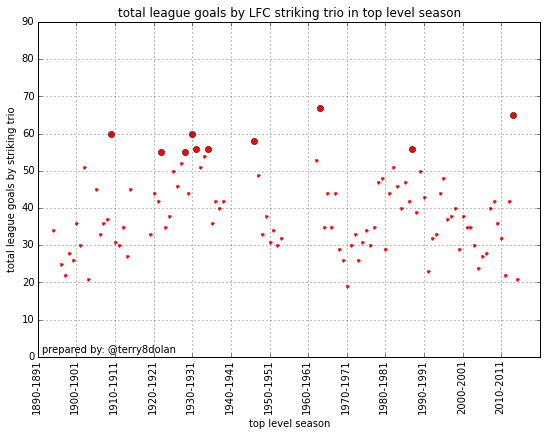

In [73]:
# And now plot using different shapes for the top3_top10 and top3_other columns 
DF = dflfc_scorers_tl_top3_lg_full
FIG_SIZE = (9, 6)

fig = plt.figure()

tot_yrs = len(DF)
tot_goals = int(DF.top3_top10.max())
XTICKS = range(0, tot_yrs+10, 10)
YTICKS = range(0, tot_goals+30, 10)

ax = DF.plot(style='r.', figsize=FIG_SIZE, x='season', y='top3_other', 
             legend=False, rot='vertical', xticks=XTICKS, yticks=YTICKS)
DF.plot(ax=ax, style='ro', figsize=FIG_SIZE, x='season', y='top3_top10', 
        legend=False, rot='vertical', xticks=XTICKS, yticks=YTICKS)

ax.set_ylabel('total league goals by striking trio')
ax.set_xlabel('top level season')
ax.set_title('total league goals by LFC striking trio in top level season')
ax.text(1, 1, 'prepared by: @terry8dolan')

fig = plt.gcf() # save current figure
plt.show()
fig.savefig('SeasonvsTrioGoals.png', bbox_inches='tight')

## Compare The Striking Trios: LFC (1963-64) with Barcelona (2014-15)

Create a new dataframe for the Barca trio

In [46]:
# create dictionary with Barca stats for 2014-15
# ref: https://en.wikipedia.org/wiki/2014%E2%80%9315_FC_Barcelona_season
barca_201415 = {'season': ['2014-2015', '2014-2015', '2014-2015'],
                'team': ['FCB', 'FCB', 'FCB'], 
                'player': ['Messi', 'Neymar', 'Suarez'], 
                'appearance': [38, 33, 26], 
                'league': [43, 22, 16]}

In [47]:
# create a dataframe from the dict
dfb_trio = pd.DataFrame(data=barca_201415, columns=['season', 'team', 'player', 'appearance', 'league'])
dfb_trio = dfb_trio.set_index('season')
dfb_trio['GPA'] = (dfb_trio.league/dfb_trio.appearance).round(2)
dfb_trio['APG'] = (dfb_trio.appearance/dfb_trio.league).round(2)
dfb_trio.head()

,team,player,appearance,league,GPA,APG
season,,,,,,
2014-2015,FCB,Messi,38,43,1.13,0.88
2014-2015,FCB,Neymar,33,22,0.67,1.50
2014-2015,FCB,Suarez,26,16,0.62,1.62


In [48]:
dfb_trio.league.sum()

81

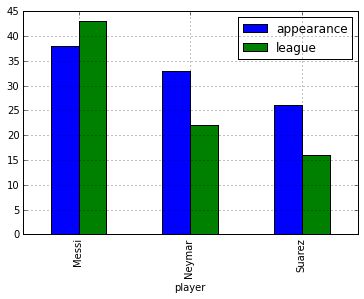

In [49]:
dfb_trio.plot(kind='bar', x='player', y=['appearance', 'league'])

Create a new dataframe for the LFC trio

In [50]:
# create dictionary with LFC stats for 1963-64
lfc_196364 = {'season': ['1963-1964', '1963-1964', '1963-1964'],
                'team': ['LFC', 'LFC', 'LFC'], 
                'player': ['Hunt', 'St John', 'Arrowsmith'], 
                'appearance': [41, 40, 20], 
                'league': [31, 21, 15]}

In [51]:
# create a dataframe from the dict
dfl_trio = pd.DataFrame(data=lfc_196364, columns=['season', 'team', 'player', 'appearance', 'league'])
dfl_trio = dfl_trio.set_index('season')
dfl_trio['GPA'] = (dfl_trio.league/dfl_trio.appearance).round(2)
dfl_trio['APG'] = (dfl_trio.appearance/dfl_trio.league).round(2)
dfl_trio.head()

,team,player,appearance,league,GPA,APG
season,,,,,,
1963-1964,LFC,Hunt,41,31,0.76,1.32
1963-1964,LFC,St John,40,21,0.52,1.90
1963-1964,LFC,Arrowsmith,20,15,0.75,1.33


In [52]:
dfl_trio.league.sum()

67

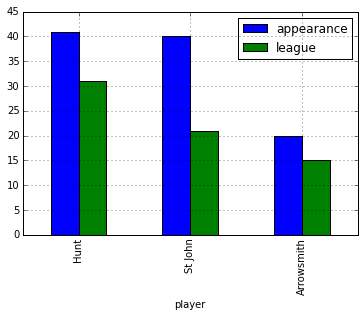

In [53]:
dfl_trio.plot(kind='bar', x='player', y=['appearance', 'league'], )

Create a new combined dataframe with LFC and Barca data

In [54]:
df_trio = pd.DataFrame()
df_trio = pd.concat([dfl_trio, dfb_trio])

In [55]:
df_trio

,team,player,appearance,league,GPA,APG
season,,,,,,
1963-1964,LFC,Hunt,41,31,0.76,1.32
1963-1964,LFC,St John,40,21,0.52,1.90
1963-1964,LFC,Arrowsmith,20,15,0.75,1.33
2014-2015,FCB,Messi,38,43,1.13,0.88
2014-2015,FCB,Neymar,33,22,0.67,1.50
2014-2015,FCB,Suarez,26,16,0.62,1.62


In [56]:
df_trio.sort('APG')

,team,player,appearance,league,GPA,APG
season,,,,,,
2014-2015,FCB,Messi,38,43,1.13,0.88
1963-1964,LFC,Hunt,41,31,0.76,1.32
1963-1964,LFC,Arrowsmith,20,15,0.75,1.33
2014-2015,FCB,Neymar,33,22,0.67,1.50
2014-2015,FCB,Suarez,26,16,0.62,1.62
1963-1964,LFC,St John,40,21,0.52,1.90


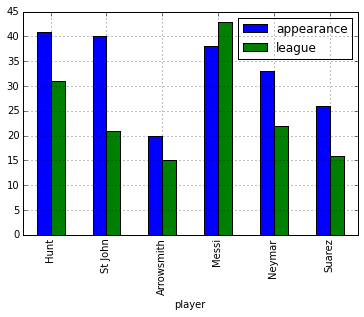

In [57]:
df_trio.plot(kind='bar', x='player', y=['appearance', 'league'])

Plot goals

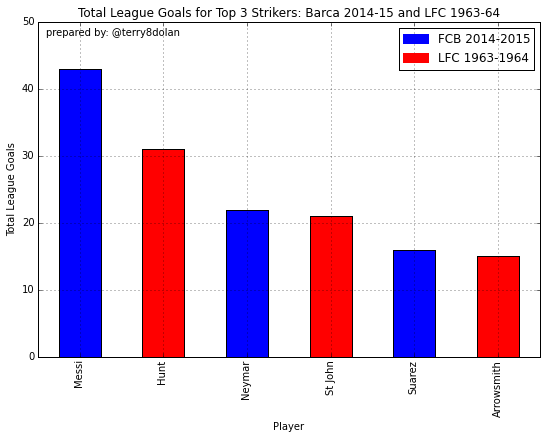

In [116]:
FIG_SIZE = (9, 6)
fig = plt.figure()

# sort the dataframe by league goals
df_trio_lg_sorted = df_trio.sort('league', ascending=False)

# produce list of colour based on team
team_colours = ['r' if team is 'LFC' else 'b' for team in df_trio_lg_sorted.team.values]

# plot dataframe
ax = df_trio_lg_sorted.plot(kind='bar', x='player', y='league', 
                            legend=False, color=['b', 'r', 'b', 'r', 'b', 'r'],
                            title='Total League Goals for Top 3 Strikers: Barca 2014-15 and LFC 1963-64',
                            figsize=FIG_SIZE, ylim=(0, 50))

# set the axis labels
ax.set_xlabel('Player')
ax.set_ylabel('Total League Goals')

# create fake legend
l1 = plt.Line2D([], [], linewidth=10, color='b') 
l2 = plt.Line2D([], [], linewidth=10, color='r')
labels = ['FCB 2014-2015', 'LFC 1963-1964']
ax.legend([l1, l2], labels)
ax.text(-.4, 48, 'prepared by: @terry8dolan')

fig = plt.gcf() # save current figure
plt.show()
fig.savefig('PlayervsGoals.png', bbox_inches='tight')

Plot Goals per Game

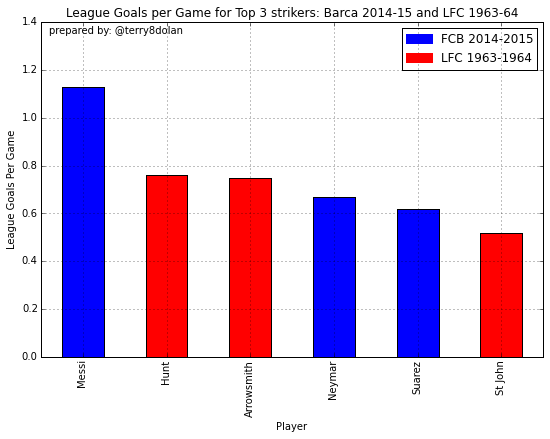

In [125]:
FIG_SIZE = (9, 6)
fig = plt.figure()

# sort the dataframe by GPA
df_trio_GPA_sorted = df_trio.sort('GPA', ascending=False)

# produce list of colour based on team
team_colours = ['r' if team is 'LFC' else 'b' for team in df_trio_GPA_sorted.team.values]

# plot the dataframe
ax = df_trio_GPA_sorted.plot(kind='bar', x='player', y='GPA', 
                             legend=False, color=team_colours,
                             title='League Goals per Game for Top 3 strikers: Barca 2014-15 and LFC 1963-64',
                             figsize=FIG_SIZE, ylim=(0, 1.4))

# set the axis labels
ax.set_xlabel('Player')
ax.set_ylabel('League Goals Per Game')

# create fake legend
l1 = plt.Line2D([], [], linewidth=10, color='b') 
l2 = plt.Line2D([], [], linewidth=10, color='r')
labels = ['FCB 2014-2015', 'LFC 1963-1964']
ax.legend([l1, l2], labels)
ax.text(-.4, 1.35, 'prepared by: @terry8dolan')

# save current figure and plot
fig = plt.gcf() 
plt.show()
fig.savefig('PlayervsGPG.png', bbox_inches='tight')

## Find key data for title winning years

In [60]:
WINNERS = ['1900-1901', '1905-1906', '1921-1922', '1922-1923', '1946-1947', '1963-1964', '1965-1966', '1972-1973', '1975-1976', 
           '1976-1977', '1978-1979', '1979-1980', '1981-1982', '1982-1983', '1983-1984', '1985-1986', '1987-1988', '1989-1990']
dfw = dflfc_scorers_tl_lg[dflfc_scorers_tl_lg.season.isin(WINNERS)].sort(['season', 'league'], ascending=False)

In [61]:
# check all 18 title winning seasons have matched
len(dfw.season.unique())

18

In [62]:
# print average number of goals by striker in title winning season
dfw_1 = dfw[['season', 'league']].groupby('season').head(1).groupby('season').sum()
round(dfw_1.sort('league', ascending=False)['league'].mean())

22.0

In [63]:
# print average number of goals by partner in title winning season
dfw_2 = dfw[['season', 'league']].groupby('season').head(2).groupby('season').nth(1)
round(dfw_2.sort('league', ascending=False)['league'].mean())

15.0

In [64]:
# print average number of goals by partnership in title winning season
dfw_p = dfw[['season', 'league']].groupby('season').head(2).groupby('season').sum()
rp = round(dfw_p.sort('league', ascending=False)['league'].mean())
print "Liverpool's history says that to win the league we need a striker partnership that will score {} goals on average.".format(rp)

Liverpool's history says that to win the league we need a striker partnership that will score 37.0 goals on average.
